# <center>Fruit Classification</center>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Exploration</a></span></li><li><span><a href="#Build-Alexnet-Architecture" data-toc-modified-id="Build-Alexnet-Architecture-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Build Alexnet Architecture</a></span></li><li><span><a href="#Use-Test-Set-to-Evaluate-The-Model" data-toc-modified-id="Use-Test-Set-to-Evaluate-The-Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Use Test Set to Evaluate The Model</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion</a></span><ul class="toc-item"><li><span><a href="#Results" data-toc-modified-id="Results-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Results</a></span></li><li><span><a href="#Problems" data-toc-modified-id="Problems-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Problems</a></span></li></ul></li></ul></div>

## Introduction

The [Fruit360 data](https://www.kaggle.com/moltean/fruits) is available at kaggle. 

The dataset is utilized in this project with Deep Learning to predict kind of fruit as the given image. 

- Explore the data, check none data.
- Process data to make it eaiser and suitable for the algorithm before going to train it.
- Use CNN to extract feature of images.
- Use classification_report to evaluate the model.





## Data Exploration

In [1]:
import os, cv2, random
import numpy as np
import pandas as pd
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import ticker
import seaborn as sns
%matplotlib inline 
%tensorflow_version 1.x
from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Convolution2D, MaxPooling2D, Dense, Activation
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.layers.normalization import BatchNormalization
from tensorflow import keras


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
Using TensorFlow backend.


In [0]:
train_path = 'Training'
test_path = 'Test'

In [9]:
from keras.preprocessing.image import ImageDataGenerator
# create a data generator
data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
# load and iterate train dataset
train_set = data_gen.flow_from_directory(directory=train_path, target_size=(227,227), color_mode='rgb', class_mode='categorical',
                                       batch_size=256, subset='training')
val_set = data_gen.flow_from_directory(directory=train_path, target_size=(227,227), color_mode='rgb', class_mode='categorical',
                                     batch_size=256, subset='validation')
test_set = data_gen.flow_from_directory(directory=test_path, target_size=(227,227), color_mode='rgb', class_mode='categorical',
                                      batch_size=256)

Found 48431 images belonging to 120 classes.
Found 12067 images belonging to 120 classes.
Found 20622 images belonging to 120 classes.


**=> There are 120 categories of fruits**

**Train set 48431 samples**

**Validation set 12067 samples**

**Test set 20622 samples**

**Now, each image is resized to 227x227 inorder to fit with AlexNet and then they are converted to matrix form**

In [10]:
categories = train_set.class_indices.keys()
print("List of categories = ",categories)


List of categories =  dict_keys(['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Dates', 'Eggplant', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan', 'Maracuja', 'Melon Piel de Sapo', 'Mulberry', 'Ne

Now, the project will show the distribution of each class in the data

In [0]:
'''Data Visualization'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette() #  This function provides an interface to many 
#(though not all) of the possible ways you can generate colors in seaborn

import pandas as pd

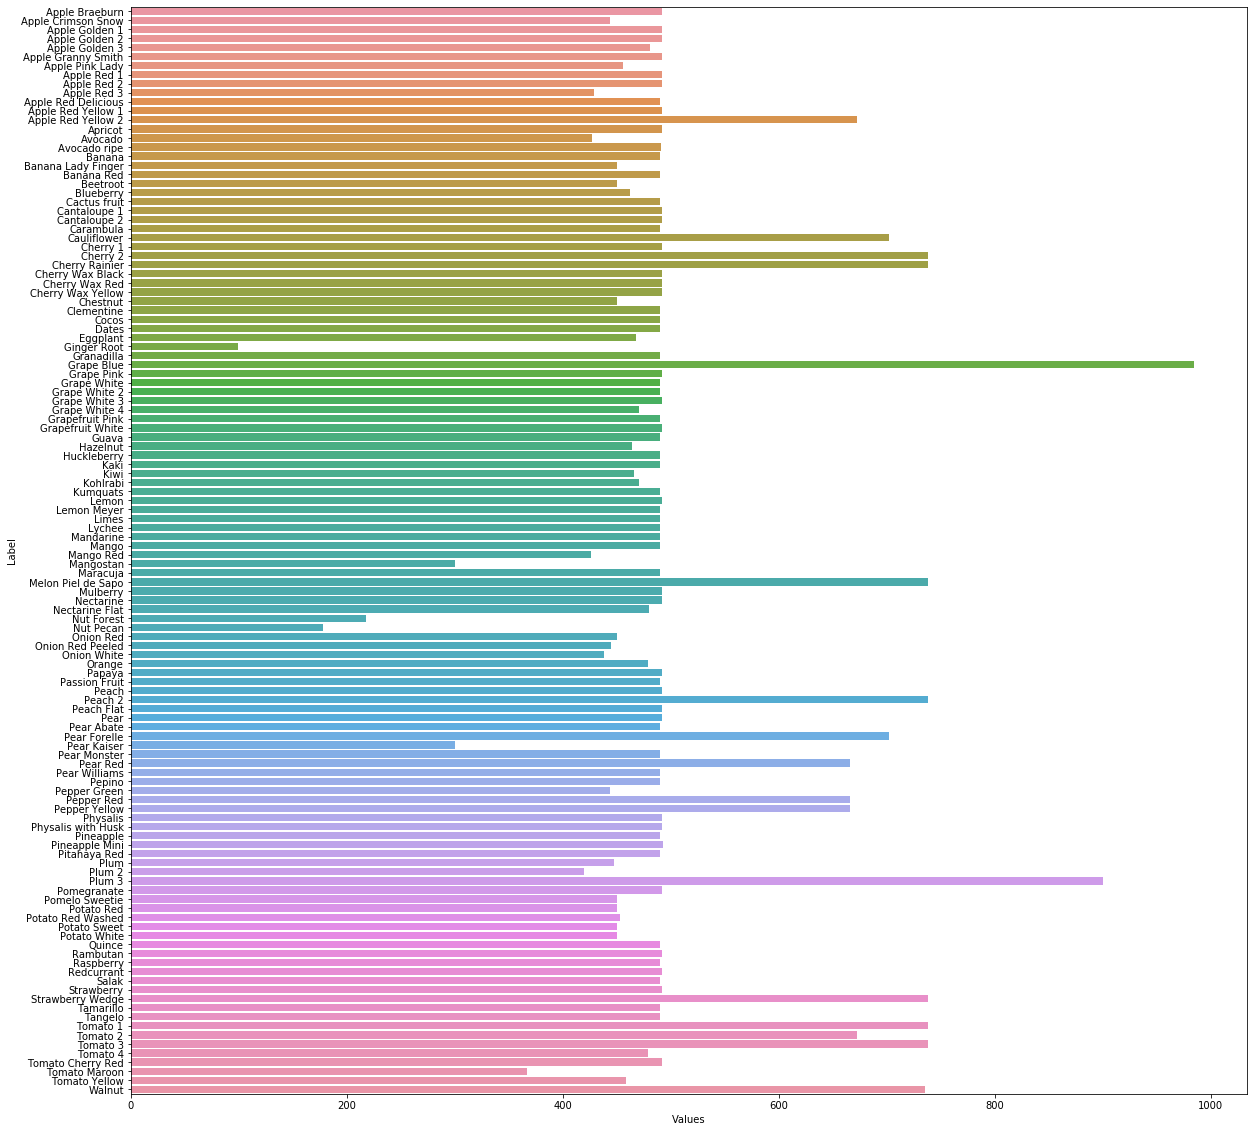

In [13]:
data  = pd.DataFrame( data = dataDic.keys(), columns=['Label'] )
data['Values'] = dataDic.values()
plt.figure(figsize=(20,20))
sns.barplot(x='Values', y= 'Label',data=data)


In [14]:
data[data['Values'] == data.Values.max()]

,Label,Values
39,Grape Blue,984


In [15]:
data[data['Values'] == data.Values.min()]

,Label,Values
37,Ginger Root,99


**From the graph it shows that the min number of images is 99 belonging to Ginger Root, while the max is Grape Blue with 984**

In [0]:
xTrain, yTrain = next(train_set)

In [17]:
yTrain.shape

(256, 120)

In [0]:
def decode_label(target, dataset):
    lis = [] #initial list
  
    for i in range(target.shape[0]):
        for k,v in dataset.class_indices.items():
          if v in np.argwhere(target[i]==1):
            lis.append(k)
           
    return lis

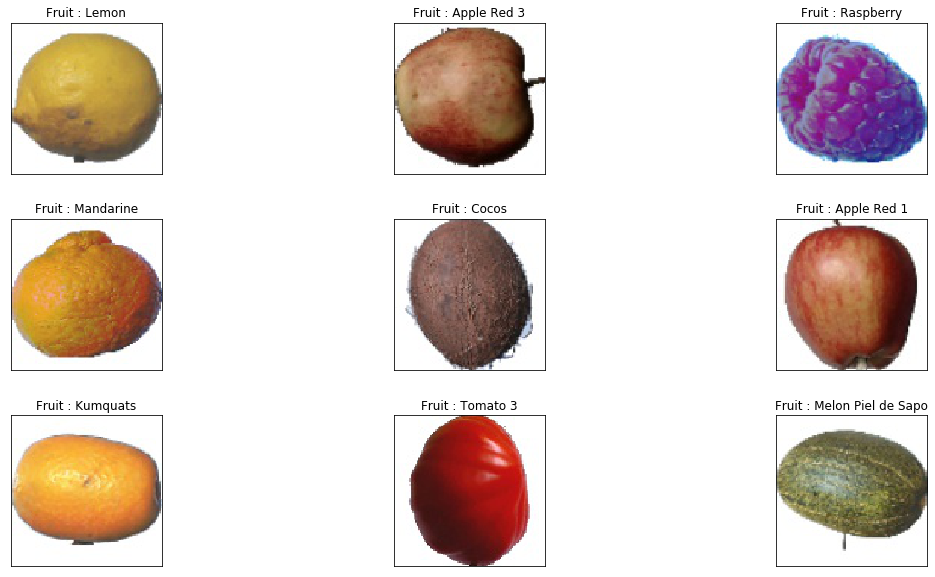

In [19]:
def display_rand_images(images, labels, ):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        plt.title('Fruit : {}'.format(  labels[r[0]] ))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()


display_rand_images(xTrain, decode_label(yTrain,train_set))

## Build Alexnet Architecture

![s](ml22-01.png)

In [20]:
model=Sequential()

#1 conv layer
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

#1 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#2 conv layer
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#3 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#4 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#5 conv layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())


model.add(Flatten())

#1 dense layer
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#2 dense layer
model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#3 dense layer
model.add(Dense(1000,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#output layer
model.add(Dense(120,activation="softmax"))

model.summary()













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 11, 11, 256)       1024

Several hyperparameters are configured:
   
   - Learning rate = 0.01
   - decay = lrate/25
   - momentum = 0.5
   - use SGD
   - metric is accuracy
   - loss = categorical_crossentroypy

In [21]:
from keras.optimizers import SGD

lrate= 0.01
decay= lrate/25
sgd = SGD(lr=lrate, momentum=0.9, decay = decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

#model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [22]:
%%time

from keras.callbacks import ModelCheckpoint
batch_size=256
#model.fit(x_train, y_train, epochs=2)
checkpointer = ModelCheckpoint(filepath = 'cnn_from_scratch_fruits.hdf5', verbose = 1, save_best_only = True)
model.fit(train_set,
        steps_per_epoch = train_set.samples//batch_size,
        epochs=10,
        validation_data=val_set,
        validation_steps= val_set.samples//batch_size,
        callbacks = [checkpointer],
        shuffle=True)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
189/189 [==============================] - 66s 351ms/step - loss: 1.3964 - acc: 0.6477 - val_loss: 0.8460 - val_acc: 0.7414

Epoch 00001: val_loss improved from inf to 0.84602, saving model to cnn_from_scratch_fruits.hdf5
Epoch 2/10
189/189 [==============================] - 71s 374ms/step - loss: 0.1653 - acc: 0.9615 - val_loss: 0.4418 - val_acc: 0.8739

Epoch 00002: val_loss improved from 0.84602 to 0.44181, saving model to cnn_from_scratch_fruits.hdf5
Epoch 3/10
189/189 [==============================] - 70s 370ms/step - loss: 0.0694 - acc: 0.9870 - val_loss: 0.2604 - val_acc: 0.9312

Epoch 00003: val_loss improved from 0.44181 to 0.26036, saving model to cnn_from_scratch_fruits.hdf5
Epoch 4/10
189/189 [==============================] - 63s 335ms/step - loss: 0.0350 - acc: 0.9957 - val_loss: 0.1738 - val_acc: 0.9501

Epoch 00004: val_loss improved from 0.26036 to 0.17377, savin

**=> The accuracy for training set is 99.95%, loss = 0.0084**

**=> 97.15% for validation test, loss = 0.1173**

**Eventhough the epoch = 10; however, just after 8th epoch the val_loss did not improve => it menas this architecture works efficiently on this dataset**

## Use Test Set to Evaluate The Model

In [0]:
dataDicTest = {}
for i in test_set.class_indices.keys():
  dataDicTest.update({ i : len(os.listdir(test_path+"/"+i)) })
#dataDicTest


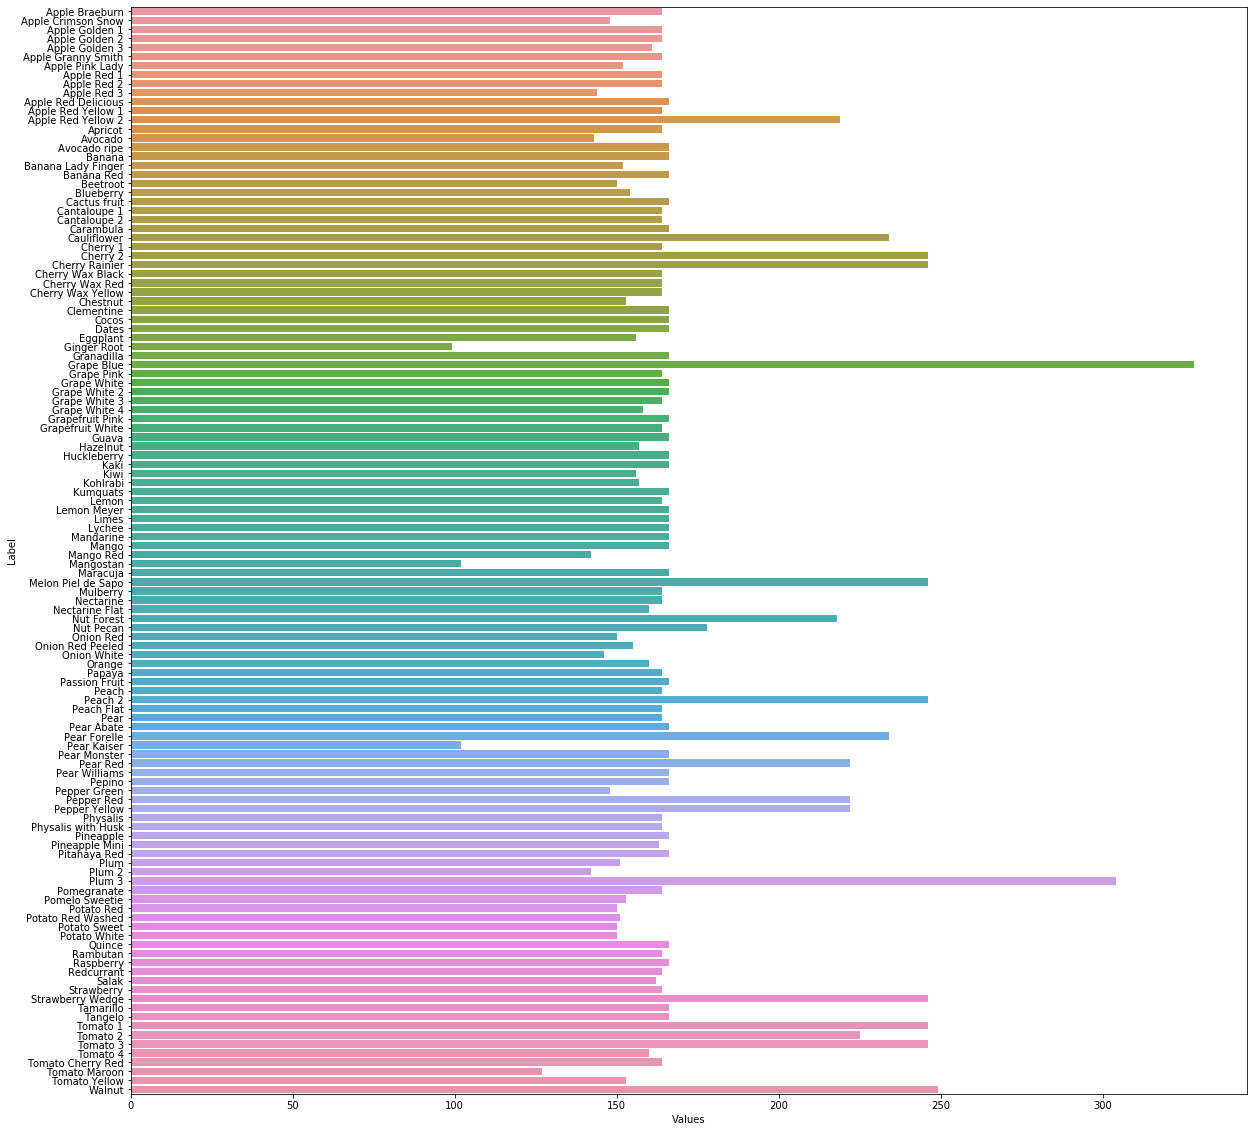

In [24]:
data  = pd.DataFrame( data = dataDicTest.keys(), columns=['Label'] )
data['Values'] = dataDicTest.values()
plt.figure(figsize=(20,20))
sns.barplot(x='Values', y= 'Label',data=data)


In [25]:
data[data['Values'] == data.Values.max()]

,Label,Values
39,Grape Blue,328


In [26]:
data[data['Values'] == data.Values.min()]

,Label,Values
37,Ginger Root,99


**From the graph, it illustrates that min in tes set is Ginger Root 99 images, while max is Grape Blue with 328**

In [27]:
# evaluate and print test accuracy
#score = model.evaluate(test_set, verbose=0)
score = model.evaluate_generator(generator=test_set, steps=test_set.samples//batch_size)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.979931640625


**The accuracy for the test set is 97.99%**

In [0]:

y_true_array = np.array([]) # initial array
y_pred_array = np.array([]) # initial array
for i in range(test_set.samples//batch_size): 
    
    X_test, y_test = next(test_set)
    predicted_y = model.predict(X_test, batch_size=256) 
    
    y_true = np.argmax(y_test, axis=1)
    y_pred = np.argmax(predicted_y, axis=1)
    y_true_array = np.append(y_true_array, y_true) 
    y_pred_array = np.append(y_pred_array, y_pred) 

In [29]:
from sklearn.metrics import classification_report
result = classification_report(y_true=y_true_array, y_pred=y_pred_array)
print(result)

              precision    recall  f1-score   support

         0.0       0.84      0.98      0.90       163
         1.0       1.00      0.76      0.86       148
         2.0       0.86      0.99      0.92       163
         3.0       0.99      1.00      1.00       164
         4.0       0.84      1.00      0.91       161
         5.0       1.00      0.98      0.99       164
         6.0       0.81      1.00      0.89       151
         7.0       1.00      0.97      0.98       161
         8.0       1.00      0.82      0.90       164
         9.0       0.88      1.00      0.94       143
        10.0       1.00      1.00      1.00       165
        11.0       1.00      0.83      0.91       163
        12.0       1.00      1.00      1.00       218
        13.0       1.00      1.00      1.00       162
        14.0       1.00      1.00      1.00       142
        15.0       0.99      1.00      1.00       166
        16.0       1.00      0.85      0.92       162
        17.0       1.00    

In This project wich metric below 0.85 will be considered as low values

In [77]:

result = classification_report(y_true=y_true_array, y_pred=y_pred_array, output_dict=True)
print(type(result))
del result['accuracy']
del result['macro avg']
del result['weighted avg']
low_precision = [] 
low_recall = [] 
low_f1_score = []
for k in result.keys():
    if result[k]['precision'] <= 0.85:
        low_precision.append(k)
    if result[k]['recall'] <= 0.85:
        low_recall.append(k)
    if result[k]['f1-score'] <= 0.85:
        low_f1_score.append(k)

low_precision = [round(float(i)) for i in low_precision]
low_recall = [round(float(i)) for i in low_recall]
low_f1_score = [round(float(i)) for i in low_f1_score]

print('low precision labels:', low_precision)
print('low recall labels:', low_recall)
print('low f1_socre labels:', low_f1_score)

<class 'dict'>
low precision labels: [0, 4, 6, 19, 21, 104]
low recall labels: [1, 8, 11, 16, 19, 24, 36, 78]
low f1_socre labels: [19, 36]


In [78]:
def decode_label2(target):
    lis = [] #initial list
    for k,v in test_set.class_indices.items():
        if v in target:
            lis.append(k)
    return lis
print('low precision labels:', decode_label2(low_precision))
print('low recall labels:', decode_label2(low_recall))
print('low f1_socre labels:', decode_label2(low_f1_score))

low precision labels: ['Apple Braeburn', 'Apple Golden 3', 'Apple Pink Lady', 'Beetroot', 'Cactus fruit', 'Rambutan']
low recall labels: ['Apple Crimson Snow', 'Apple Red 2', 'Apple Red Yellow 1', 'Banana', 'Beetroot', 'Carambula', 'Eggplant', 'Pear']
low f1_socre labels: ['Beetroot', 'Eggplant']


**Low precision labels:**

- 'Apple Braeburn', 'Apple Golden 3', 'Apple Pink Lady', 'Beetroot', 'Cactus fruit', 'Rambutan'

**low recall labels:**

- 'Apple Crimson Snow', 'Apple Red 2', 'Apple Red Yellow 1', 'Banana', 'Beetroot', 'Carambula', 'Eggplant', 'Pear'

**low f1_socre labels:**

- 'Beetroot', 'Eggplant' 


print several woring labels

2


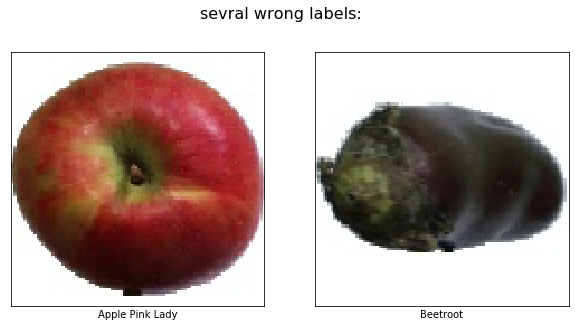

In [79]:
import matplotlib.pyplot as plt
test_label = list(test_set.class_indices.keys())
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    print(len(mislabeled_indices[0]))
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]
    fig = plt.figure(figsize=(10,5))
    fig.suptitle("sevral wrong labels:", fontsize=16)
    for i in range(len(mislabeled_indices[0])):
        plt.subplot(1,len(mislabeled_indices[0]),i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(mislabeled_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[mislabeled_labels[i]])
    plt.show()
    
print_mislabeled_images(test_label, X_test, y_true, y_pred)    

**=> The all the dataset from train, val, test give accuracy > 97% for classification of each fruits category. However, in every picture, there is only single fruit**

**Now the multiple fruits in one picture will be used to test how much the model can detect fruits**

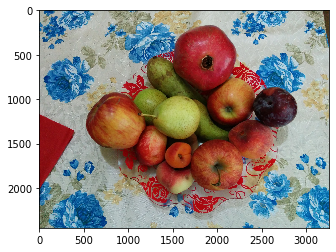

In [73]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
# Load an color image in color
img = cv2.imread('test-multiple_fruits/apple_apricot_nectarine_peach_peach(flat)_pomegranate_pear_plum.jpg',1) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
#Show the image with matplotlib
plt.imshow(img)
plt.show()

In [74]:
new_img = cv2.resize(img, (227,227)) #resize
new_img= new_img.reshape(1, 227 , 227, 3)
new_img.shape

(1, 227, 227, 3)

In [75]:
predicted = model.predict(new_img)
print(predicted)
predicted = np.argmax(predicted)
print(predicted)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
29


In [76]:
mydict = test_set.class_indices
print(list(mydict.keys())[list(mydict.values()).index(predicted)])

Cherry Wax Black


**In the picture, there are apple, apricot, pomegranate, pear , plum**

**Model predict => Cherry Wax Black**

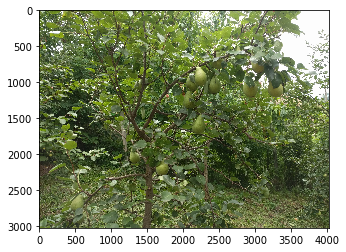

In [69]:
# Load an color image in color
img = cv2.imread('test-multiple_fruits/pears2.jpg',1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#Show the image with matplotlib
plt.imshow(img)
plt.show()

In [70]:
new_img = cv2.resize(img, (227,227)) #resize
new_img= new_img.reshape(1, 227 , 227, 3)
new_img.shape

(1, 227, 227, 3)

In [71]:
predicted = model.predict(new_img)
print(predicted)
predicted = np.argmax(predicted)
print(predicted)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
17


In [72]:
mydict = test_set.class_indices
print(list(mydict.keys())[list(mydict.values()).index(predicted)])

Banana Lady Finger


**In the picture, there are pears with background is forest**

**Model predict => Banana Lady Finger**

## Conclusion 

### Results

This project use CNN with Alexnet architecture. This model works very well with the **accuracy*:
    - 99.95%% for training set 
    - 97.15% for validation => no overfit
    - 97.99% for test set => work with data unseen very well
    
The f1_score for all class nearly 1, except 'Beetroot', 'Eggplant'. 

< 0.85
**Low precision labels:**

- 'Apple Braeburn', 'Apple Golden 3', 'Apple Pink Lady', 'Beetroot', 'Cactus fruit', 'Rambutan'

**low recall labels:**

- 'Apple Crimson Snow', 'Apple Red 2', 'Apple Red Yellow 1', 'Banana', 'Beetroot', 'Carambula', 'Eggplant', 'Pear'

**low f1_socre labels:**

- 'Beetroot', 'Eggplant' 


### Problems

**The biggest problem is that the training data is too clean as well as val and test (single fruit with white background and no noise) => it leads to the model cannot predict the picture which has multiple fruits or single fruit with background not white**

- In the picture, there are apple, apricot, pomegranate, pear , plum. Model predict => Cherry Wax Black

- In the picture, there are pears with background is forest. Model predict => Banana Lady Finger

**Soltion for multiple fruits**

- Predict the image. Instead of choosing the max one, set the threshold for each fruit, if it is greaer than the threshold set as fruit

However, this project cannot implement this idea beacuse whithout choosing max it also automatically choose
![](a.png)

=> might be the value is too small and it automatically round up.

=> Another solution, train with **multi-task learning model**

**Soltion for simple background fruits**

Get more data to with complex background 

**=> In conclusion, should get more data with noise and complex background to solve these problem**